In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Display the first few rows
print(df.head())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [3]:
# Basic structure and data types
print(df.info())

# Summary statistics for numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
print(f"Shape of dataset: {df.shape}")
print(f"Column names: {df.columns.tolist()}")
print(f"Target column unique values:\n{df['Attrition'].value_counts()}")


Shape of dataset: (1470, 35)
Column names: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Target column unique values:
Attrition
No     1233
Yes     237
Name: count, dtype: int64


In [7]:
# Drop non-informative columns
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1)


In [9]:
print(df.isnull().sum())


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [11]:
from sklearn.preprocessing import LabelEncoder

# Convert target to binary
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Label Encode binary columns
label_enc = LabelEncoder()
df['Gender'] = label_enc.fit_transform(df['Gender'])         # Male=1, Female=0
df['OverTime'] = label_enc.fit_transform(df['OverTime'])     # Yes=1, No=0

# One-Hot Encode other categorical columns
df = pd.get_dummies(df, columns=[
    'BusinessTravel', 'Department', 'EducationField',
    'JobRole', 'MaritalStatus'
], drop_first=True)


# Step 3: Exploratory Data Analysis (EDA)

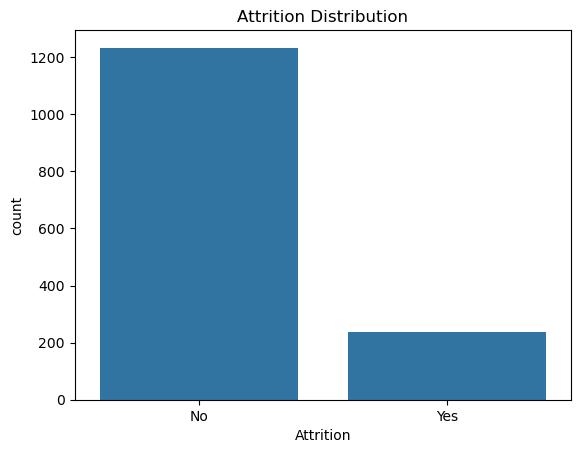

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


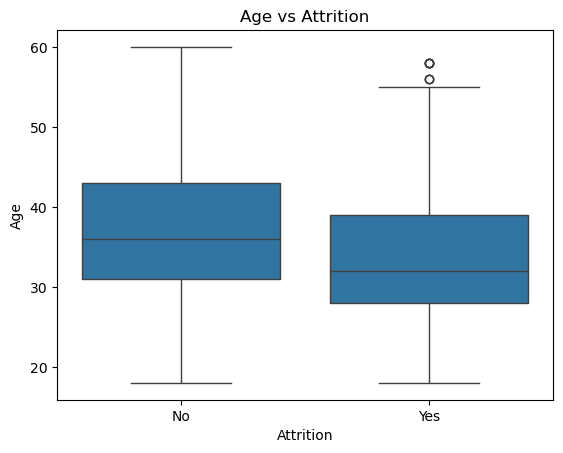

In [16]:
# Example: Age vs Attrition
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Age vs Attrition')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


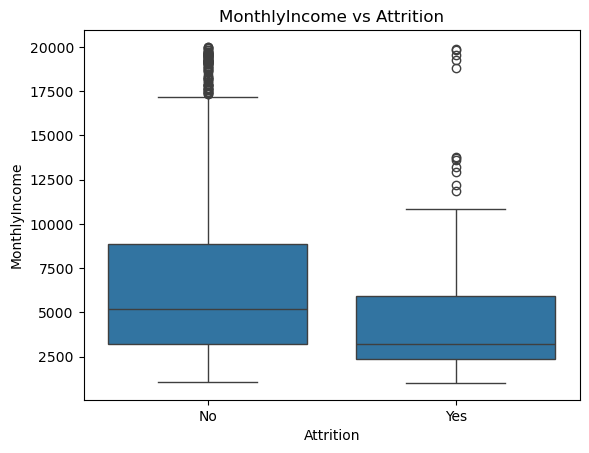

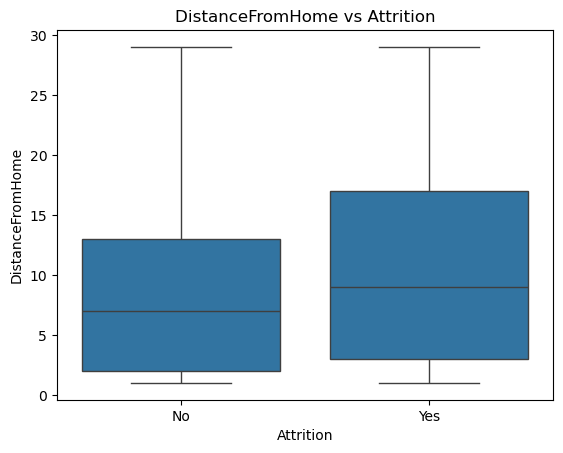

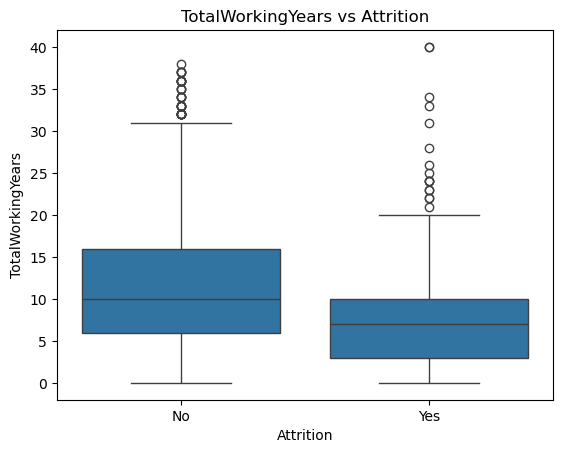

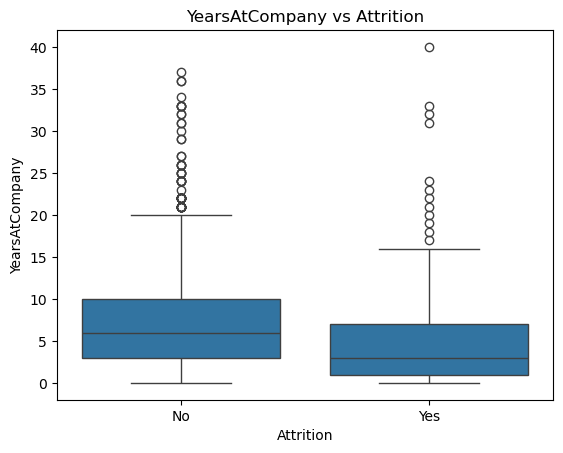

In [18]:
for col in ['MonthlyIncome', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany']:
    sns.boxplot(x='Attrition', y=col, data=df)
    plt.title(f'{col} vs Attrition')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.show()


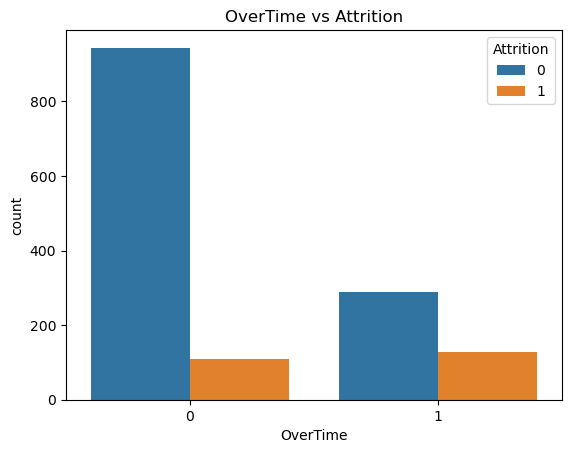

ValueError: Could not interpret value `JobRole` for `x`. An entry with this name does not appear in `data`.

In [20]:
# Overtime vs Attrition
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('OverTime vs Attrition')
plt.show()

# JobRole vs Attrition
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.xticks(rotation=45)
plt.title('Job Role vs Attrition')
plt.show()


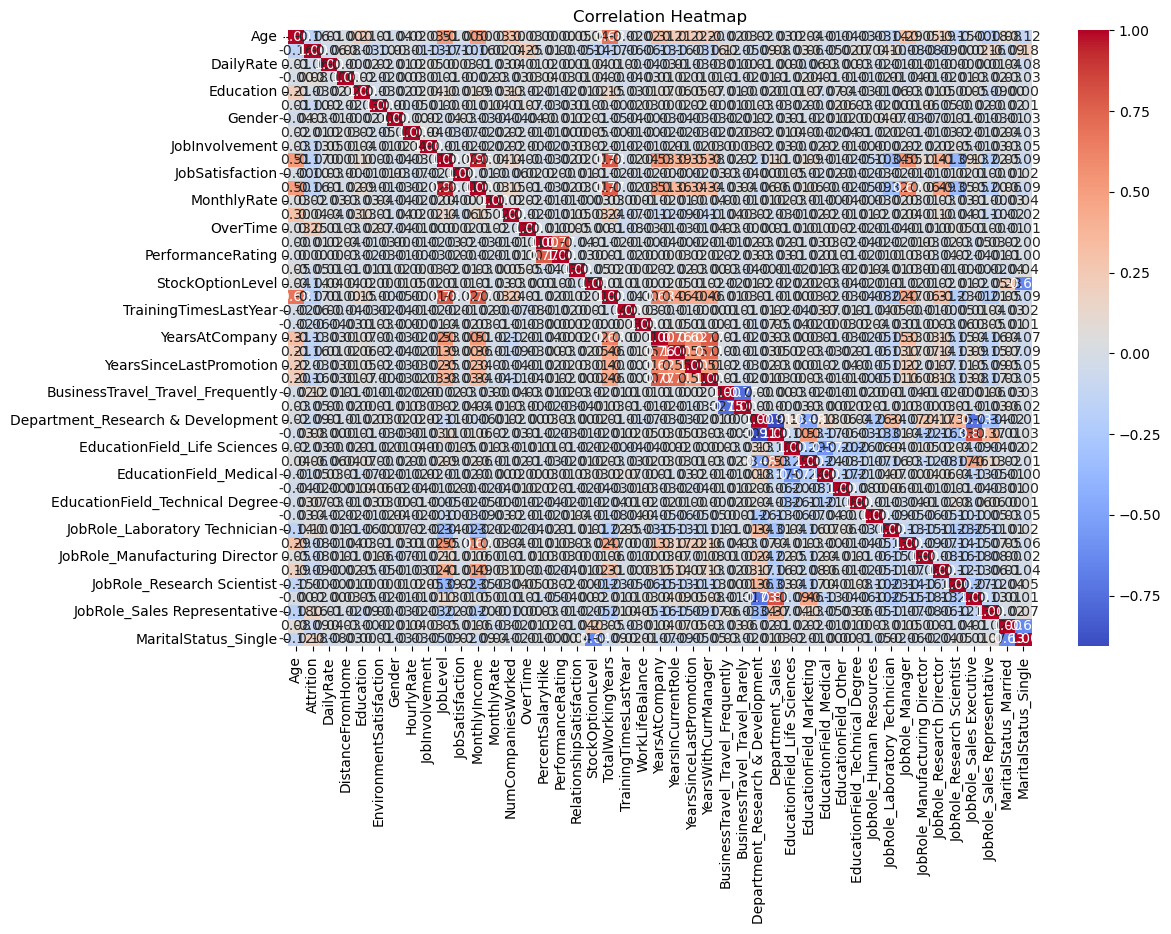

In [22]:
# Only numeric features
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Step 4: Model Selection & Training

###  1. Split the Data

In [25]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [39]:
from sklearn.preprocessing import StandardScaler

# Recreate data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Then split the scaled data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Re-fit model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [43]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)


C:\Users\PR\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:28:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

##  3. Evaluate Models

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"=== {name} ===")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_prob))
    print()

# Evaluate all
evaluate_model(logreg, "Logistic Regression")
evaluate_model(rf, "Random Forest")
evaluate_model(xgb, "XGBoost")


=== Logistic Regression ===
[[237  10]
 [ 31  16]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294

ROC AUC Score: 0.8079076578516668

=== Random Forest ===
[[240   7]
 [ 44   3]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       247
           1       0.30      0.06      0.11        47

    accuracy                           0.83       294
   macro avg       0.57      0.52      0.50       294
weighted avg       0.76      0.83      0.78       294

ROC AUC Score: 0.7826686191747781

=== XGBoost ===
[[239   8]
 [ 36  11]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       247
           1       0.58      0.2

## 1. Use Class Weights

In [50]:
logreg = LogisticRegression(class_weight='balanced', max_iter=2000)
logreg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=2000)

In [52]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [54]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=3)


In [56]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


##  1. Feature Importance in Random Forest / XGBoost

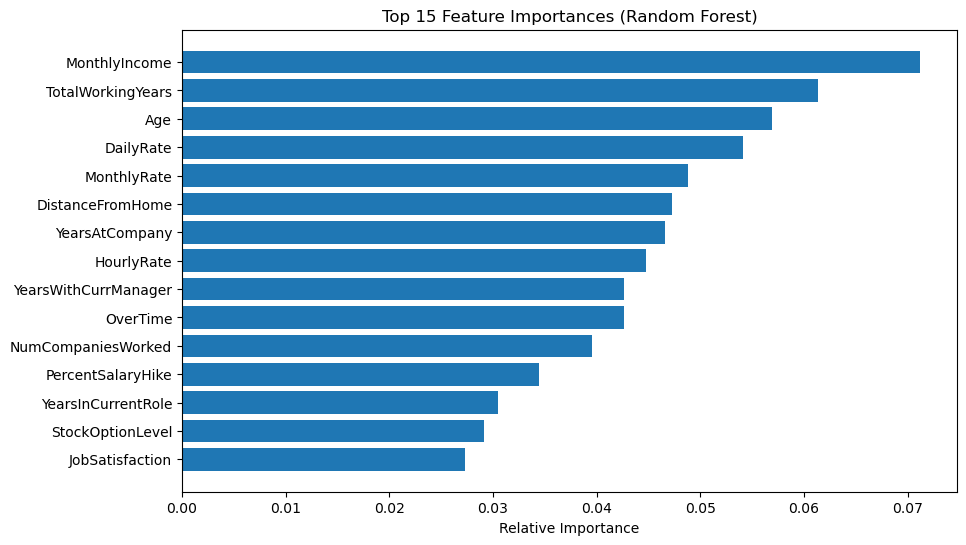

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# For Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[-15:]  # Top 15 features
features = X.columns[indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features)
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Relative Importance')
plt.show()


C:\Users\PR\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:46:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


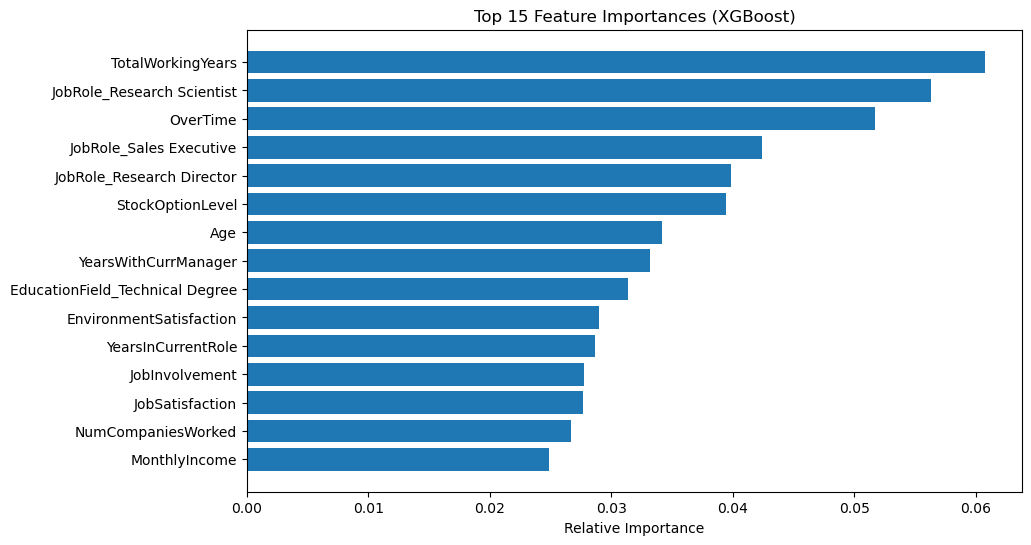

In [63]:
from xgboost import XGBClassifier

# Reinitialize and train the model (if needed)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)  # 👈 This is essential

# Then get feature importances
import numpy as np
import matplotlib.pyplot as plt

importances = xgb.feature_importances_
indices = np.argsort(importances)[-15:]
features = X.columns[indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features)
plt.title('Top 15 Feature Importances (XGBoost)')
plt.xlabel('Relative Importance')
plt.show()


In [65]:
from sklearn.utils.validation import check_is_fitted
check_is_fitted(xgb)


##  2. Feature Coefficients in Logistic Regression

In [68]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
})

# Sort by absolute value
coefficients['abs'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='abs', ascending=False).drop(columns='abs')

print(coefficients.head(15))


                             Feature  Coefficient
35     JobRole_Laboratory Technician     0.797874
13                          OverTime     0.766412
25  BusinessTravel_Travel_Frequently     0.719335
8                           JobLevel     0.659189
18                 TotalWorkingYears    -0.656931
41      JobRole_Sales Representative     0.552515
26      BusinessTravel_Travel_Rarely     0.511649
29      EducationField_Life Sciences    -0.506505
23           YearsSinceLastPromotion     0.500389
28                  Department_Sales     0.481690
12                NumCompaniesWorked     0.466958
24              YearsWithCurrManager    -0.463668
43              MaritalStatus_Single     0.456168
31            EducationField_Medical    -0.447583
4            EnvironmentSatisfaction    -0.435730
